### Import Libraries

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras import losses, optimizers, initializers
from keras.initializers import he_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, log_loss
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, LeakyReLU

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### MNIST Image Data Acquisition

In [ ]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Compute the Number of Labels
num_labels = len(np.unique(y_train))

### MNIST Image Data Pre-Processing
The raw dataset is not ideal for training a machine learning model. The images are still in raw grayscale format wherein each pixel is $\epsilon [0,255]$. The labels are in raw digit format $\epsilon [0,9]$. Both input and output data must be pre-processed first.

- Converting Raw Labels into a One-Hot Vector:
The labels are in raw digit format (e.g. 0,1, ...,9). It is not ideal for computing the $y=f(x)=p(y|x)$ which is a mulitnoulli or categorical distribution. Therefore, the labels are converted into one-hot vector using `tf.keras` `to_categorical()` utility function.

In [ ]:
# One-Hot Vector Conversion
# e.g. 3 -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

- Normalizing the Pixel Values:
The pixel values (e.g. 0 to 255) is normalized to $[0.0, 1.0]$ so that the network can be easily trained. In other words, no wild fluctuations in weights in biases.

In [ ]:
# Image Dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size

# Resize and Normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
# Hyper-Parameters
batch_size = 128
n_units = 256
epochs = 20

# EXPERIMENTS

### Model 1
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.1
- Weight Initialization: Random

In [ ]:
# Create the model
model1 = Sequential()
model1.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model1.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model1.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model1.add(Dense(10, activation='softmax', name='output_layer'))
model1.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model1.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-09-02 21:20:24.439488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-02 21:20:24.439505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
# train the network
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model1.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 21:20:24.965309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.5332 - accuracy: 0.8475

2023-09-02 21:20:29.751340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 11ms/step - loss: 0.5332 - accuracy: 0.8475 - val_loss: 0.2461 - val_accuracy: 0.9226
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1879 - accuracy: 0.9427 - val_loss: 0.1503 - val_accuracy: 0.9548
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1281 - accuracy: 0.9626 - val_loss: 0.1208 - val_accuracy: 0.9625
Epoch 4/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0968 - accuracy: 0.9720 - val_loss: 0.1055 - val_accuracy: 0.9667
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.0906 - val_accuracy: 0.9716
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0602 - accuracy: 0.9823 - val_loss: 0.0970 - val_accuracy: 0.9703
Epoch 7/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0681 - val_accuracy: 0.9781
Epoch 8/20
4

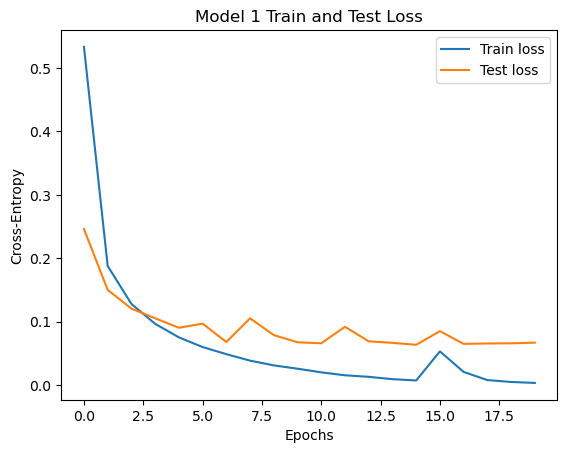

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 1 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

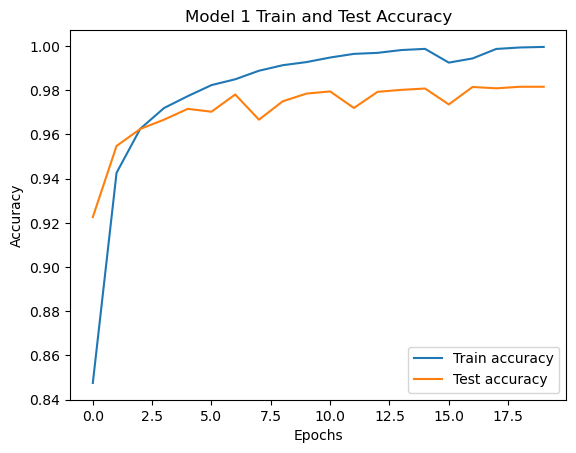

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 1 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 1 Model | Test Data
test_loss, test_acc = model1.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.0671 - accuracy: 0.9816
Test Accuracy: 0.9815999865531921
Test Loss: 0.067082479596138


In [ ]:
# Make predictions on the test set
y_pred = model1.predict(x_test)

 50/313 [===>..........................] - ETA: 0s

2023-09-02 21:21:56.311345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 2
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.01
- Weight Initialization: Random

In [ ]:
# Create the model
model2 = Sequential()
model2.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model2.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model2.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model2.add(Dense(10, activation='softmax', name='output_layer'))
model2.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model2.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model2.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
 13/469 [..............................] - ETA: 4s - loss: 2.2970 - accuracy: 0.0992

2023-09-02 21:21:57.409449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.7730 - accuracy: 0.6080

2023-09-02 21:22:01.476498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 1.7730 - accuracy: 0.6080 - val_loss: 0.9113 - val_accuracy: 0.8010
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6156 - accuracy: 0.8500 - val_loss: 0.4390 - val_accuracy: 0.8859
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4055 - accuracy: 0.8890 - val_loss: 0.3533 - val_accuracy: 0.9009
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3441 - accuracy: 0.9031 - val_loss: 0.3132 - val_accuracy: 0.9113
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3101 - accuracy: 0.9113 - val_loss: 0.2851 - val_accuracy: 0.9198
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2850 - accuracy: 0.9186 - val_loss: 0.2652 - val_accuracy: 0.9260
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2651 - accuracy: 0.9238 - val_loss: 0.2472 - val_accuracy: 0.9294
Epoch 8/20
469/4

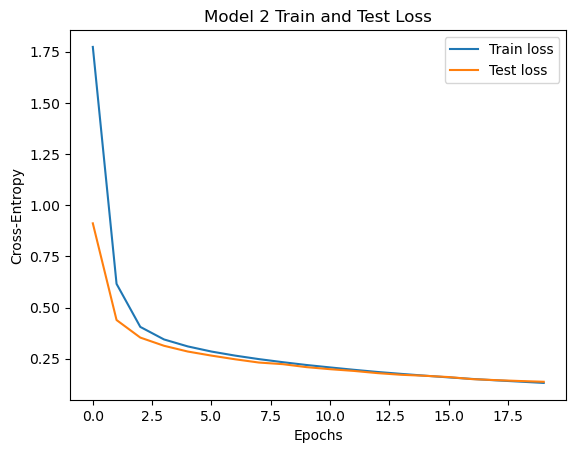

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 2 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

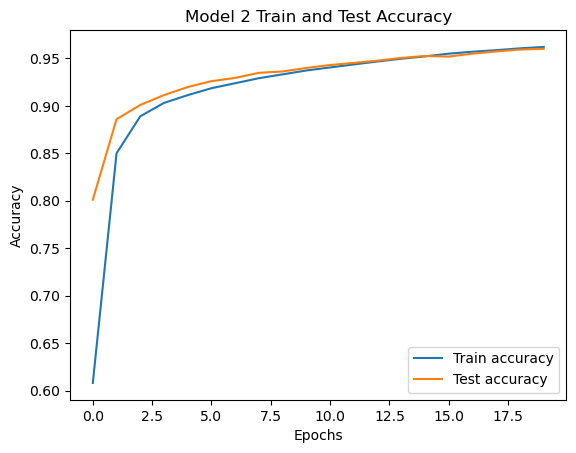

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 2 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 2 Model | Test Data
test_loss, test_acc = model2.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.1375 - accuracy: 0.9601
Test Accuracy: 0.960099995136261
Test Loss: 0.1374613344669342


In [ ]:
# Make predictions on the test set
y_pred = model2.predict(x_test)

 89/313 [=======>......................] - ETA: 0s

2023-09-02 21:23:27.159142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.96       892
           6       0.96      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.93      0.95      0.94       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Model 3
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.001
- Weight Initialization: Random

In [ ]:
# Create the model
model3 = Sequential()
model3.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model3.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model3.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model3.add(Dense(10, activation='softmax', name='output_layer'))
model3.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model3.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model3.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
 13/469 [..............................] - ETA: 4s - loss: 2.3097 - accuracy: 0.0781

2023-09-02 21:23:28.119471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 2.2893 - accuracy: 0.1694

2023-09-02 21:23:32.249557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 2.2892 - accuracy: 0.1695 - val_loss: 2.2660 - val_accuracy: 0.2841
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.2441 - accuracy: 0.3569 - val_loss: 2.2152 - val_accuracy: 0.4383
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1861 - accuracy: 0.4947 - val_loss: 2.1453 - val_accuracy: 0.5679
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1044 - accuracy: 0.6078 - val_loss: 2.0457 - val_accuracy: 0.6674
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.9877 - accuracy: 0.6816 - val_loss: 1.9038 - val_accuracy: 0.7193
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.8246 - accuracy: 0.7258 - val_loss: 1.7101 - val_accuracy: 0.7566
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.6108 - accuracy: 0.7581 - val_loss: 1.4703 - val_accuracy: 0.7799
Epoch 8/20
469/4

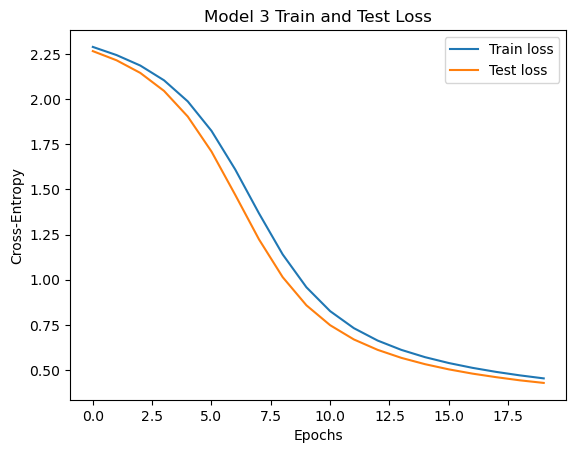

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 3 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

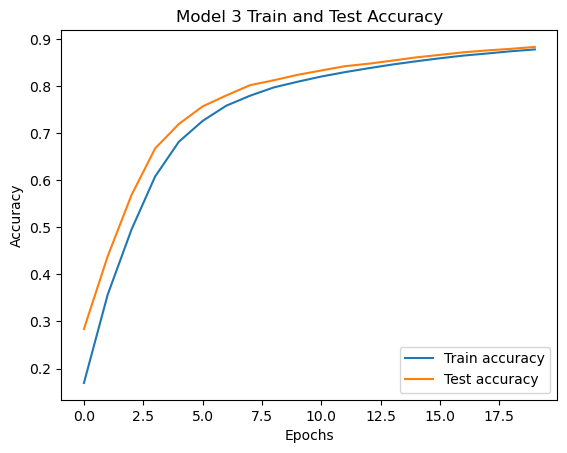

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 3 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 3 Model | Test Data
test_loss, test_acc = model3.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.4288 - accuracy: 0.8829
Test Accuracy: 0.8828999996185303
Test Loss: 0.42882251739501953


In [ ]:
# Make predictions on the test set
y_pred = model3.predict(x_test)

 89/313 [=======>......................] - ETA: 0s

2023-09-02 21:29:44.777886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.88      0.85      0.86      1032
           3       0.86      0.88      0.87      1010
           4       0.86      0.89      0.87       982
           5       0.84      0.78      0.81       892
           6       0.90      0.91      0.90       958
           7       0.91      0.88      0.90      1028
           8       0.87      0.83      0.85       974
           9       0.84      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Model 4
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.1
- Weight Initialization: He

In [ ]:
# Create the model
model4 = Sequential()
model4.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model4.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model4.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model4.add(Dense(10, activation='softmax', name='output_layer'))
model4.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model4.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model4.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
 12/469 [..............................] - ETA: 4s - loss: 1.7962 - accuracy: 0.5033

2023-09-02 21:29:45.789237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


466/469 [============================>.] - ETA: 0s - loss: 0.3452 - accuracy: 0.8988

2023-09-02 21:29:49.851141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.3443 - accuracy: 0.8991 - val_loss: 0.1616 - val_accuracy: 0.9516
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1388 - accuracy: 0.9583 - val_loss: 0.1101 - val_accuracy: 0.9674
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0951 - accuracy: 0.9717 - val_loss: 0.0943 - val_accuracy: 0.9710
Epoch 4/20
469/469 [==============================] - 241s 514ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0832 - val_accuracy: 0.9736
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0749 - val_accuracy: 0.9757
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 7/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.0747 - val_accuracy: 0.9758
Epoch 8/2

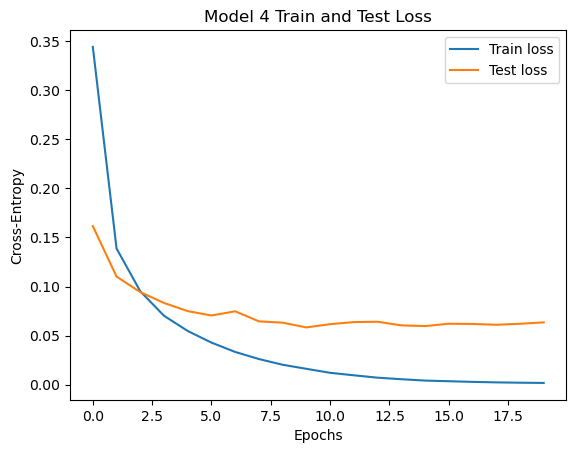

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 4 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

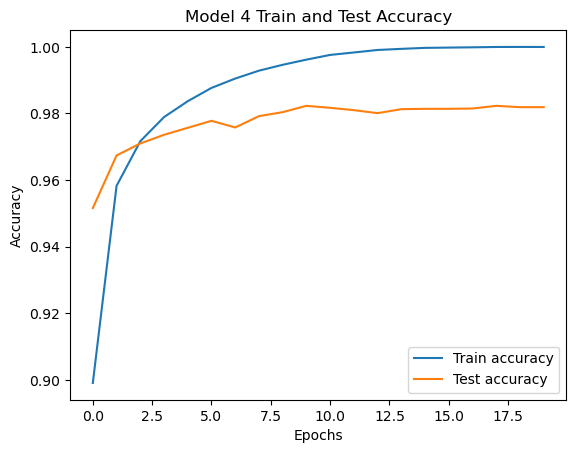

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 4 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 4 Model | Test Data
test_loss, test_acc = model4.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.0634 - accuracy: 0.9819
Test Accuracy: 0.9818999767303467
Test Loss: 0.06342991441488266


In [ ]:
# Make predictions on the test set
y_pred = model4.predict(x_test)

 86/313 [=======>......................] - ETA: 0s

2023-09-02 21:35:13.265500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 5
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.01
- Weight Initialization: He

In [ ]:
# Create the model
model5 = Sequential()
model5.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model5.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model5.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model5.add(Dense(10, activation='softmax', name='output_layer'))
model5.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model5.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model5.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
 12/469 [..............................] - ETA: 4s - loss: 2.2905 - accuracy: 0.1263

2023-09-02 21:35:14.266627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.8837 - accuracy: 0.7847

2023-09-02 21:35:18.415423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.8837 - accuracy: 0.7847 - val_loss: 0.3908 - val_accuracy: 0.8952
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.3476 - accuracy: 0.9036 - val_loss: 0.2927 - val_accuracy: 0.9186
Epoch 3/20
469/469 [==============================] - 4s 10ms/step - loss: 0.2810 - accuracy: 0.9201 - val_loss: 0.2525 - val_accuracy: 0.9275
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2457 - accuracy: 0.9297 - val_loss: 0.2264 - val_accuracy: 0.9340
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2209 - accuracy: 0.9365 - val_loss: 0.2072 - val_accuracy: 0.9399
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2010 - accuracy: 0.9423 - val_loss: 0.1900 - val_accuracy: 0.9454
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1849 - accuracy: 0.9470 - val_loss: 0.1791 - val_accuracy: 0.9464
Epoch 8/20

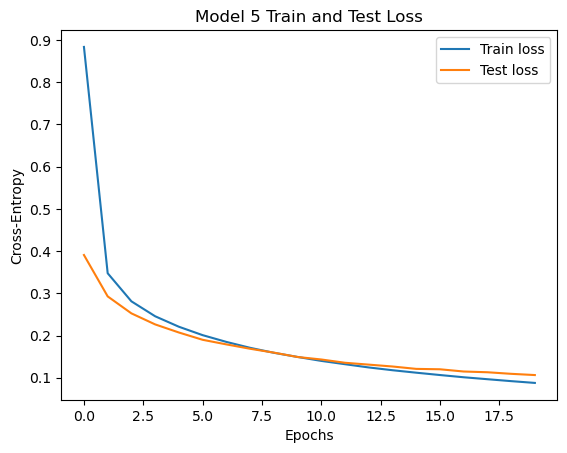

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 5 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

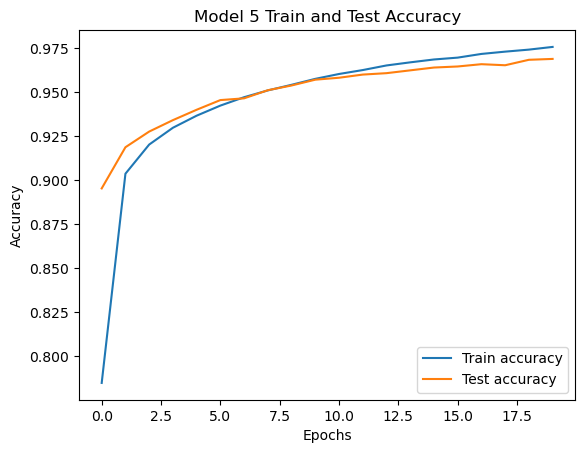

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 5 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 5 Model | Test Data
test_loss, test_acc = model5.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.1064 - accuracy: 0.9688
Test Accuracy: 0.9688000082969666
Test Loss: 0.1064056009054184


In [ ]:
# Make predictions on the test set
y_pred = model5.predict(x_test)

 79/313 [======>.......................] - ETA: 0s

2023-09-02 21:42:34.479075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Model 6
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 256
- Learning Rate: 0.001
- Weight Initialization: He

In [ ]:
# Create the model
model6 = Sequential()
model6.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model6.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model6.add(Dense(256, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model6.add(Dense(10, activation='softmax', name='output_layer'))
model6.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model6.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 884762 (3.38 MB)
Trainable params: 884762 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model6.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  6/469 [..............................] - ETA: 4s - loss: 2.3115 - accuracy: 0.1732  

2023-09-02 21:47:08.628612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


467/469 [============================>.] - ETA: 0s - loss: 2.1063 - accuracy: 0.3985

2023-09-02 21:47:13.064797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 2.1056 - accuracy: 0.3993 - val_loss: 1.8905 - val_accuracy: 0.6088
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.6783 - accuracy: 0.6711 - val_loss: 1.4209 - val_accuracy: 0.7384
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.2338 - accuracy: 0.7661 - val_loss: 1.0159 - val_accuracy: 0.8108
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.9103 - accuracy: 0.8174 - val_loss: 0.7690 - val_accuracy: 0.8424
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.7207 - accuracy: 0.8427 - val_loss: 0.6288 - val_accuracy: 0.8599
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6090 - accuracy: 0.8582 - val_loss: 0.5430 - val_accuracy: 0.8716
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.5375 - accuracy: 0.8678 - val_loss: 0.4868 - val_accuracy: 0.8805
Epoch 8/20

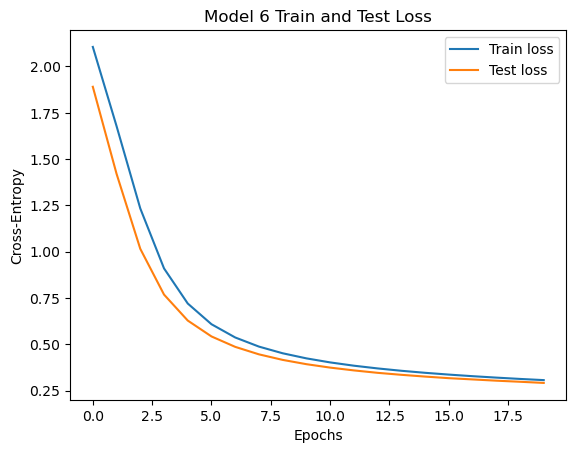

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 6 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

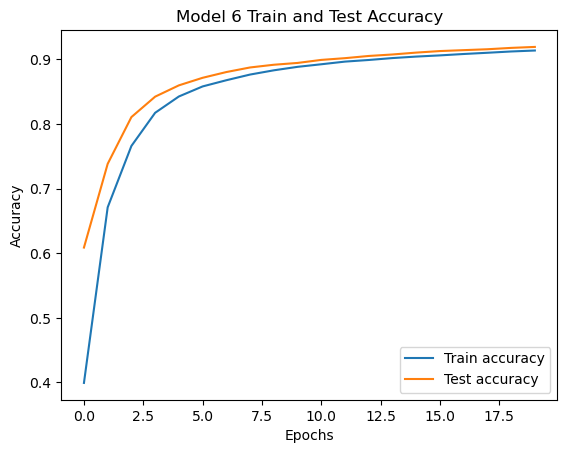

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 6 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 6 Model | Test Data
test_loss, test_acc = model6.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.2922 - accuracy: 0.9194
Test Accuracy: 0.9193999767303467
Test Loss: 0.29221054911613464


In [ ]:
# Make predictions on the test set
y_pred = model6.predict(x_test)

 78/313 [======>.......................] - ETA: 0s

2023-09-02 21:48:47.365588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.90      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.90      0.86      0.88       892
           6       0.93      0.94      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.89      0.89       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Model 7
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.1
- Weight Initialization: Random

In [ ]:
# Create the model
model7 = Sequential()
model7.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model7.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model7.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model7.add(Dense(10, activation='softmax', name='output_layer'))
model7.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model7.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model7.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model7.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 21:48:48.322027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 0.5203 - accuracy: 0.8501

2023-09-02 21:48:52.719131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.5198 - accuracy: 0.8502 - val_loss: 0.2237 - val_accuracy: 0.9327
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1844 - accuracy: 0.9450 - val_loss: 0.1511 - val_accuracy: 0.9527
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1252 - accuracy: 0.9635 - val_loss: 0.1171 - val_accuracy: 0.9647
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0925 - accuracy: 0.9729 - val_loss: 0.0892 - val_accuracy: 0.9714
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0798 - val_accuracy: 0.9749
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0746 - val_accuracy: 0.9774
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0756 - val_accuracy: 0.9764
Epoch 8/20

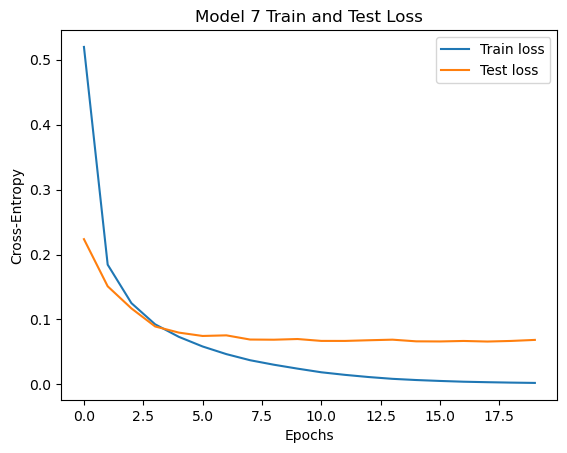

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 7 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

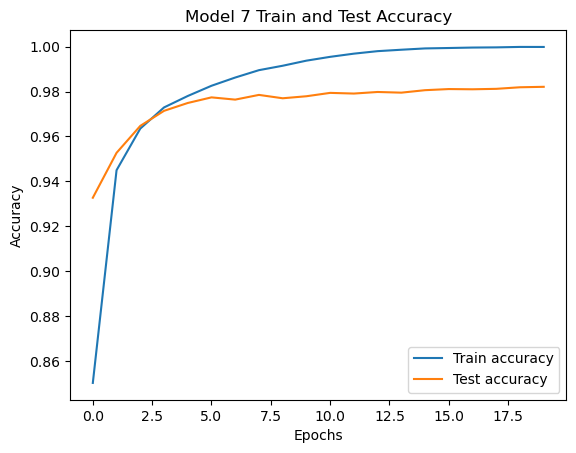

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 7 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 7 Model | Test Data
test_loss, test_acc = model7.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.0685 - accuracy: 0.9821
Test Accuracy: 0.9821000099182129
Test Loss: 0.0685393437743187


In [ ]:
# Make predictions on the test set
y_pred = model7.predict(x_test)

 86/313 [=======>......................] - ETA: 0s

2023-09-02 21:50:22.931939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 8
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.01
- Weight Initialization: Random

In [ ]:
# Create the model
model8 = Sequential()
model8.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model8.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model8.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model8.add(Dense(10, activation='softmax', name='output_layer'))
model8.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model8.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model8.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model8.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 21:50:23.826228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.7333 - accuracy: 0.5867

2023-09-02 21:50:28.143150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 1.7333 - accuracy: 0.5867 - val_loss: 0.8815 - val_accuracy: 0.8085
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6009 - accuracy: 0.8525 - val_loss: 0.4334 - val_accuracy: 0.8849
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4011 - accuracy: 0.8894 - val_loss: 0.3481 - val_accuracy: 0.9023
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3411 - accuracy: 0.9040 - val_loss: 0.3134 - val_accuracy: 0.9100
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3081 - accuracy: 0.9120 - val_loss: 0.2825 - val_accuracy: 0.9197
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2837 - accuracy: 0.9187 - val_loss: 0.2672 - val_accuracy: 0.9251
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2643 - accuracy: 0.9244 - val_loss: 0.2478 - val_accuracy: 0.9290
Epoch 8/20

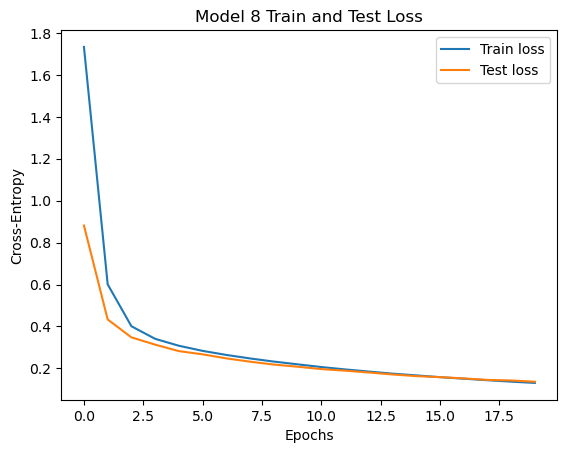

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 8 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

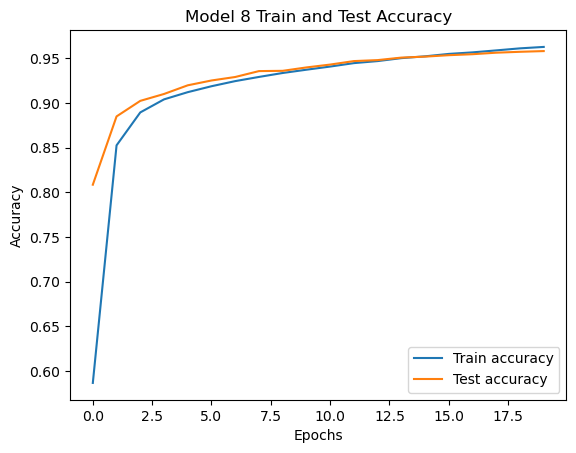

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 8 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 8 Model | Test Data
test_loss, test_acc = model8.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.1365 - accuracy: 0.9580
Test Accuracy: 0.9580000042915344
Test Loss: 0.13654226064682007


In [ ]:
# Make predictions on the test set
y_pred = model8.predict(x_test)

 85/313 [=======>......................] - ETA: 0s

2023-09-02 21:51:57.046008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.94      0.97      0.96       982
           5       0.95      0.94      0.95       892
           6       0.95      0.96      0.96       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.97      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Model 9
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.001
- Weight Initialization: Random

In [ ]:
# Create the model
model9 = Sequential()
model9.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model9.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model9.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model9.add(Dense(10, activation='softmax', name='output_layer'))
model9.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model9.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model9.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model9.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  6/469 [..............................] - ETA: 5s - loss: 2.3074 - accuracy: 0.0768  

2023-09-02 21:51:58.001412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 2.2849 - accuracy: 0.1466

2023-09-02 21:52:02.205996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 2.2848 - accuracy: 0.1468 - val_loss: 2.2606 - val_accuracy: 0.2727
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 2.2376 - accuracy: 0.3734 - val_loss: 2.2067 - val_accuracy: 0.4468
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 2.1770 - accuracy: 0.4863 - val_loss: 2.1338 - val_accuracy: 0.5312
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 2.0920 - accuracy: 0.5581 - val_loss: 2.0299 - val_accuracy: 0.6083
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 1.9704 - accuracy: 0.6259 - val_loss: 1.8821 - val_accuracy: 0.6656
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 1.8036 - accuracy: 0.6719 - val_loss: 1.6882 - val_accuracy: 0.7112
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 1.5976 - accuracy: 0.7104 - val_loss: 1.4652 - val_accuracy: 0.7400
Epoch 8/20

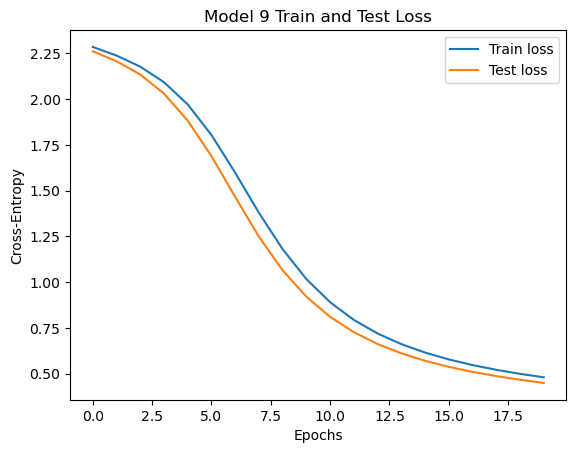

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 9 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

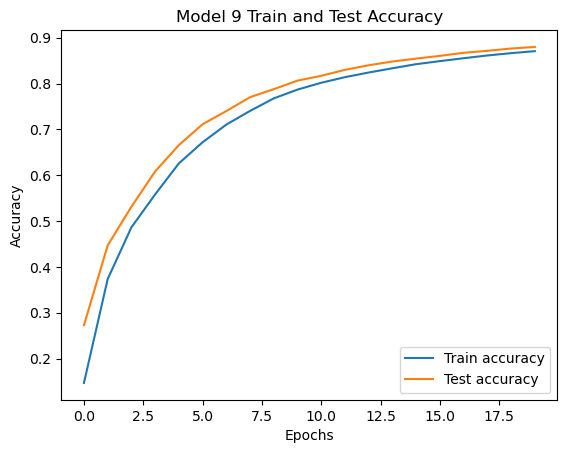

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 9 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 9 Model | Test Data
test_loss, test_acc = model9.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 7ms/step - loss: 0.4498 - accuracy: 0.8799
Test Accuracy: 0.8798999786376953
Test Loss: 0.44976139068603516


In [ ]:
# Make predictions on the test set
y_pred = model9.predict(x_test)

 80/313 [======>.......................] - ETA: 0s

2023-09-02 21:53:32.036260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.94      0.97      0.95      1135
           2       0.91      0.86      0.88      1032
           3       0.83      0.90      0.86      1010
           4       0.85      0.90      0.87       982
           5       0.84      0.74      0.79       892
           6       0.90      0.92      0.91       958
           7       0.90      0.88      0.89      1028
           8       0.85      0.82      0.83       974
           9       0.84      0.83      0.84      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Model 10
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.1
- Weight Initialization: He

In [ ]:
# Create the model
model10 = Sequential()
model10.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model10.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model10.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model10.add(Dense(10, activation='softmax', name='output_layer'))
model10.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model10.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model10.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model10.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
 10/469 [..............................] - ETA: 5s - loss: 1.9693 - accuracy: 0.4437

2023-09-02 21:53:33.001420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3553 - accuracy: 0.8975

2023-09-02 21:53:37.354145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 10ms/step - loss: 0.3553 - accuracy: 0.8975 - val_loss: 0.1631 - val_accuracy: 0.9515
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1434 - accuracy: 0.9574 - val_loss: 0.1285 - val_accuracy: 0.9602
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.0953 - val_accuracy: 0.9712
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0751 - accuracy: 0.9779 - val_loss: 0.0902 - val_accuracy: 0.9721
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0578 - accuracy: 0.9831 - val_loss: 0.0810 - val_accuracy: 0.9733
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.1050 - val_accuracy: 0.9662
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0686 - val_accuracy: 0.9794
Epoch 8/20

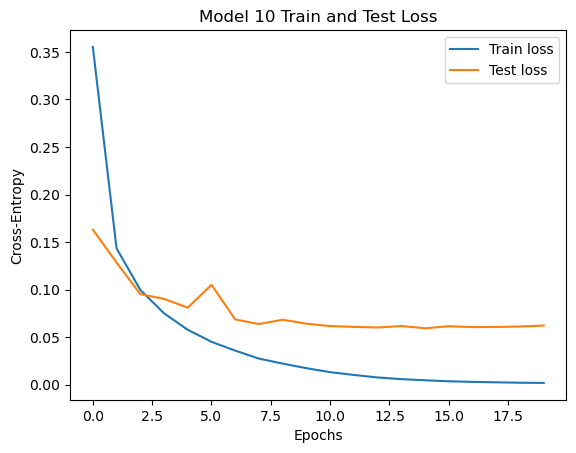

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 10 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

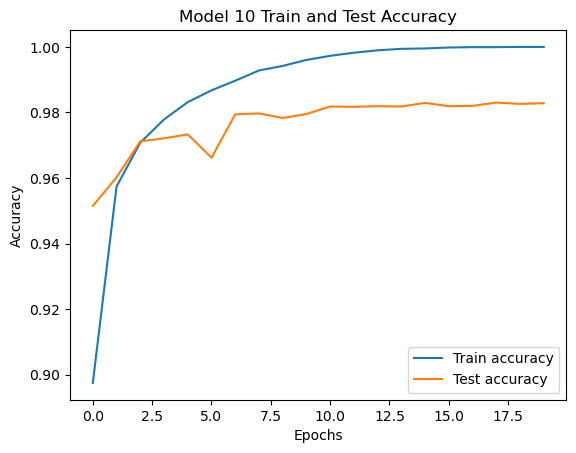

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 10 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 10 Model | Test Data
test_loss, test_acc = model10.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.0622 - accuracy: 0.9828
Test Accuracy: 0.9828000068664551
Test Loss: 0.062200676649808884


In [ ]:
# Make predictions on the test set
y_pred = model10.predict(x_test)

 87/313 [=======>......................] - ETA: 0s

2023-09-02 21:55:11.674297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 11
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.01
- Weight Initialization: He

In [ ]:
# Create the model
model11 = Sequential()
model11.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model11.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model11.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model11.add(Dense(10, activation='softmax', name='output_layer'))
model11.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model11.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model11.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model11.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 21:55:12.569529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.8985

2023-09-02 21:55:17.077124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 0.3440 - accuracy: 0.8985 - val_loss: 0.1838 - val_accuracy: 0.9426
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1402 - accuracy: 0.9591 - val_loss: 0.1383 - val_accuracy: 0.9595
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0952 - accuracy: 0.9721 - val_loss: 0.1136 - val_accuracy: 0.9652
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0834 - val_accuracy: 0.9728
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0554 - accuracy: 0.9836 - val_loss: 0.0749 - val_accuracy: 0.9761
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.0685 - val_accuracy: 0.9784
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.1038 - val_accuracy: 0.9654
Epoch 8/20

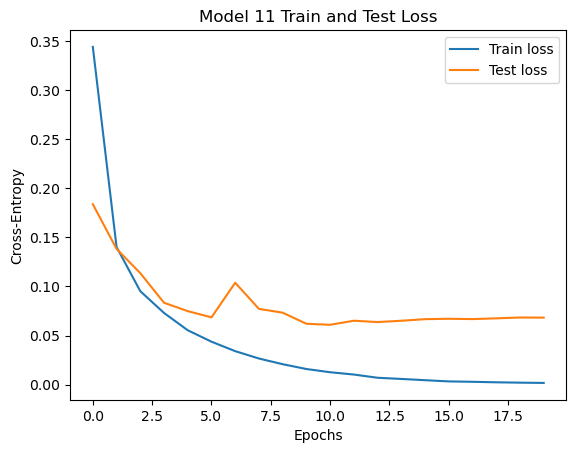

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 11 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

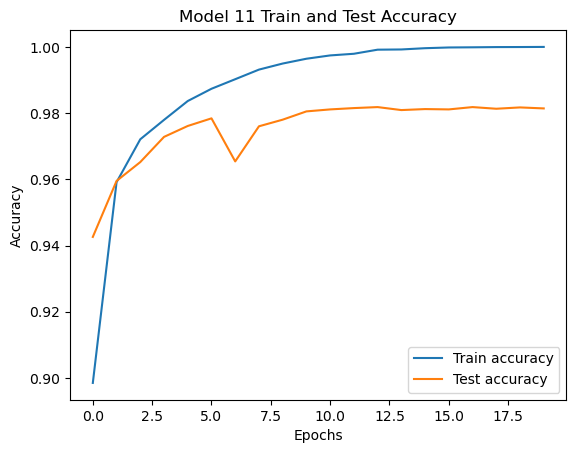

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 11 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 11 Model | Test Data
test_loss, test_acc = model11.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 9ms/step - loss: 0.0683 - accuracy: 0.9814
Test Accuracy: 0.9814000129699707
Test Loss: 0.06826421618461609


In [ ]:
# Make predictions on the test set
y_pred = model11.predict(x_test)

 68/313 [=====>........................] - ETA: 0s

2023-09-02 21:56:56.626442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 12
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 128
- Learning Rate: 0.001
- Weight Initialization: He

In [ ]:
# Create the model
model12 = Sequential()
model12.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model12.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model12.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model12.add(Dense(10, activation='softmax', name='output_layer'))
model12.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model12.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 850586 (3.24 MB)
Trainable params: 850586 (3.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model12.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model12.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  3/469 [..............................] - ETA: 12s - loss: 2.3574 - accuracy: 0.1198 

2023-09-02 21:56:57.607728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.1090 - accuracy: 0.3650

2023-09-02 21:57:02.581852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 2.1090 - accuracy: 0.3650 - val_loss: 1.8510 - val_accuracy: 0.5937
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 1.6139 - accuracy: 0.6710 - val_loss: 1.3370 - val_accuracy: 0.7457
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 1.1620 - accuracy: 0.7774 - val_loss: 0.9582 - val_accuracy: 0.8178
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8688 - accuracy: 0.8269 - val_loss: 0.7393 - val_accuracy: 0.8488
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6997 - accuracy: 0.8487 - val_loss: 0.6131 - val_accuracy: 0.8634
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5980 - accuracy: 0.8621 - val_loss: 0.5346 - val_accuracy: 0.8730
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5322 - accuracy: 0.8705 - val_loss: 0.4823 - val_accuracy: 0.8810
Epoch 8/20

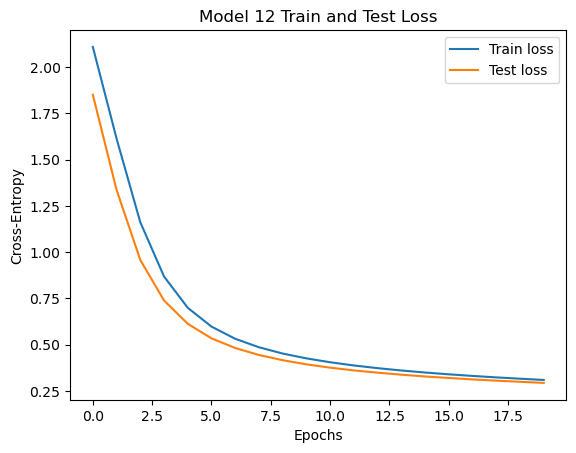

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 12 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

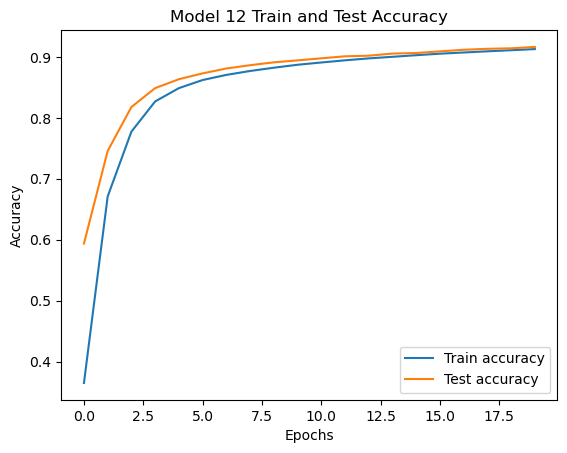

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 12 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 12 Model | Test Data
test_loss, test_acc = model12.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.2937 - accuracy: 0.9164
Test Accuracy: 0.9164000153541565
Test Loss: 0.2937271296977997


In [ ]:
# Make predictions on the test set
y_pred = model12.predict(x_test)

 88/313 [=======>......................] - ETA: 0s

2023-09-02 21:58:42.725026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.90      0.92      0.91       982
           5       0.90      0.87      0.88       892
           6       0.92      0.93      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.90      0.88      0.89       974
           9       0.88      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Model 13
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.1
- Weight Initialization: Random

In [ ]:
# Create the model
model13 = Sequential()
model13.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model13.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model13.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model13.add(Dense(10, activation='softmax', name='output_layer'))
model13.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model13.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model13.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model13.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 21:58:43.653206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.8266

2023-09-02 21:58:48.499451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 11ms/step - loss: 0.6038 - accuracy: 0.8266 - val_loss: 0.2285 - val_accuracy: 0.9340
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1957 - accuracy: 0.9421 - val_loss: 0.1460 - val_accuracy: 0.9568
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1321 - accuracy: 0.9607 - val_loss: 0.1129 - val_accuracy: 0.9648
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0998 - accuracy: 0.9708 - val_loss: 0.0991 - val_accuracy: 0.9672
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0765 - accuracy: 0.9778 - val_loss: 0.0859 - val_accuracy: 0.9736
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0612 - accuracy: 0.9823 - val_loss: 0.0837 - val_accuracy: 0.9726
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0739 - val_accuracy: 0.9751
Epoch 8/20

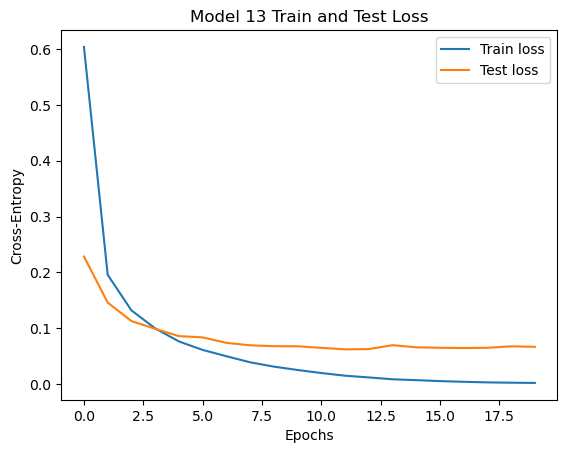

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 13 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

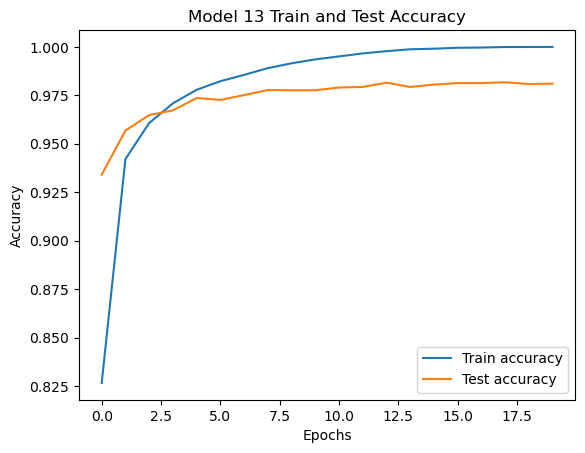

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 13 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 13 Model | Test Data
test_loss, test_acc = model13.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.0668 - accuracy: 0.9810
Test Accuracy: 0.9810000061988831
Test Loss: 0.06680260598659515


In [ ]:
# Make predictions on the test set
y_pred = model13.predict(x_test)

 88/313 [=======>......................] - ETA: 0s

2023-09-02 22:00:26.026831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 14
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.01
- Weight Initialization: Random

In [ ]:
# Create the model
model14 = Sequential()
model14.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model14.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model14.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model14.add(Dense(10, activation='softmax', name='output_layer'))
model14.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model14.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model14.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model14.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  5/469 [..............................] - ETA: 6s - loss: 2.3066 - accuracy: 0.1063  

2023-09-02 22:00:26.940327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.0429 - accuracy: 0.4577

2023-09-02 22:00:31.530752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 2.0429 - accuracy: 0.4577 - val_loss: 1.4390 - val_accuracy: 0.6130
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8882 - accuracy: 0.7758 - val_loss: 0.5783 - val_accuracy: 0.8433
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4963 - accuracy: 0.8628 - val_loss: 0.4142 - val_accuracy: 0.8854
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3929 - accuracy: 0.8893 - val_loss: 0.3549 - val_accuracy: 0.9006
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3445 - accuracy: 0.9018 - val_loss: 0.3183 - val_accuracy: 0.9114
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3131 - accuracy: 0.9106 - val_loss: 0.2962 - val_accuracy: 0.9153
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2900 - accuracy: 0.9174 - val_loss: 0.2725 - val_accuracy: 0.9228
Epoch 8/20

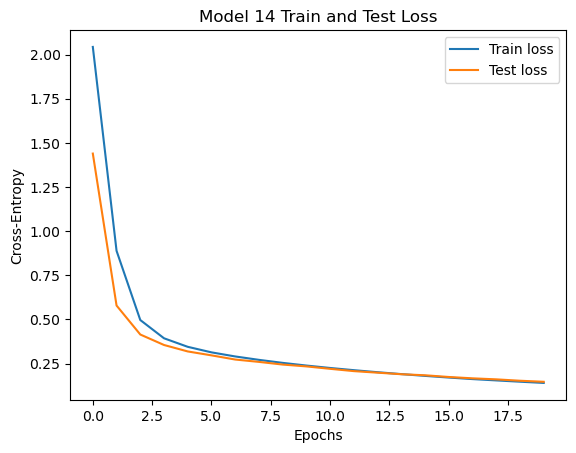

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 14 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

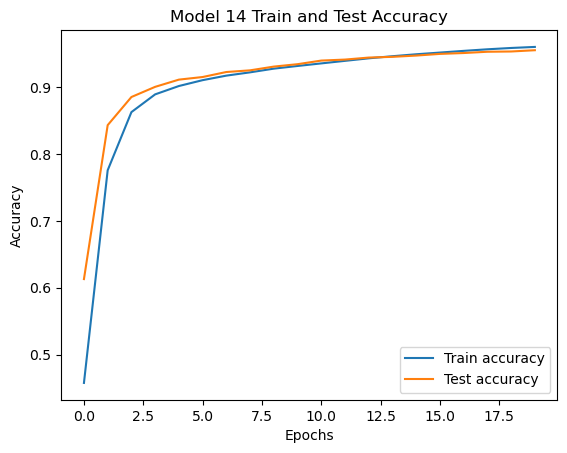

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 14 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 14 Model | Test Data
test_loss, test_acc = model14.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.1465 - accuracy: 0.9554
Test Accuracy: 0.9553999900817871
Test Loss: 0.14654040336608887


In [ ]:
# Make predictions on the test set
y_pred = model14.predict(x_test)

 88/313 [=======>......................] - ETA: 0s

2023-09-02 22:02:08.514520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.96      0.94      0.95      1010
           4       0.95      0.96      0.96       982
           5       0.95      0.94      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.95      0.96      0.95     10000
weighted avg       0.96      0.96      0.96     10000



### Model 15
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.001
- Weight Initialization: Random

In [ ]:
# Create the model
model15 = Sequential()
model15.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model15.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model15.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model15.add(Dense(10, activation='softmax', name='output_layer'))
model15.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model15.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model15.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model15.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  4/469 [..............................] - ETA: 7s - loss: 2.3016 - accuracy: 0.1035  

2023-09-02 22:02:09.437727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2908 - accuracy: 0.1452

2023-09-02 22:02:14.066750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 2.2908 - accuracy: 0.1452 - val_loss: 2.2791 - val_accuracy: 0.1825
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 2.2674 - accuracy: 0.2155 - val_loss: 2.2525 - val_accuracy: 0.2463
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 2.2373 - accuracy: 0.2924 - val_loss: 2.2166 - val_accuracy: 0.3313
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 2.1956 - accuracy: 0.3756 - val_loss: 2.1660 - val_accuracy: 0.4273
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 2.1365 - accuracy: 0.4613 - val_loss: 2.0945 - val_accuracy: 0.4933
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 2.0535 - accuracy: 0.5117 - val_loss: 1.9950 - val_accuracy: 0.5383
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 1.9396 - accuracy: 0.5460 - val_loss: 1.8613 - val_accuracy: 0.5658
Epoch 8/20

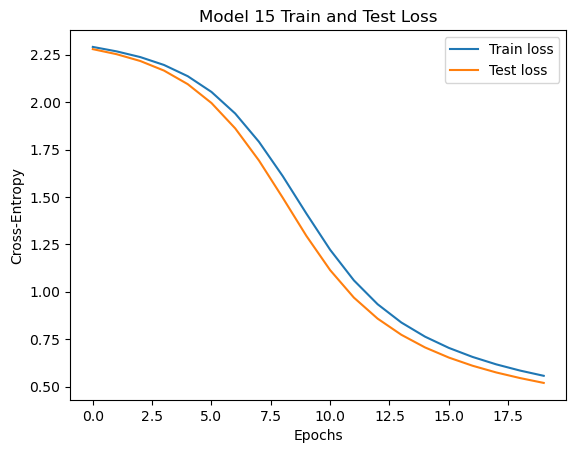

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 15 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

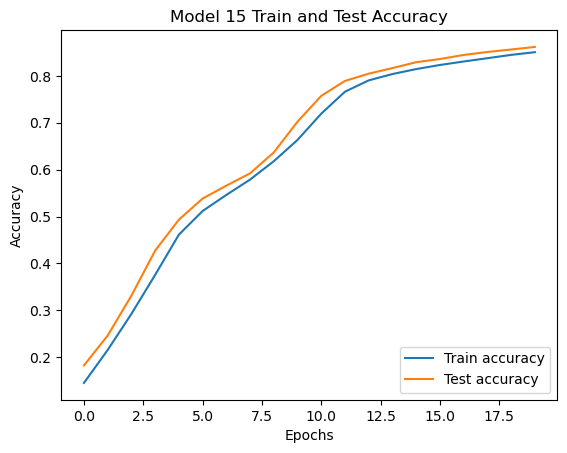

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 15 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 15 Model | Test Data
test_loss, test_acc = model15.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.5194 - accuracy: 0.8616
Test Accuracy: 0.8615999817848206
Test Loss: 0.5193884372711182


In [ ]:
# Make predictions on the test set
y_pred = model15.predict(x_test)

 86/313 [=======>......................] - ETA: 0s

2023-09-02 22:03:55.138787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       980
           1       0.93      0.97      0.95      1135
           2       0.88      0.83      0.86      1032
           3       0.84      0.87      0.85      1010
           4       0.82      0.85      0.84       982
           5       0.84      0.71      0.77       892
           6       0.90      0.90      0.90       958
           7       0.91      0.88      0.90      1028
           8       0.78      0.80      0.79       974
           9       0.80      0.80      0.80      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Model 16
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.1
- Weight Initialization: He

In [ ]:
# Create the model
model16 = Sequential()
model16.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model16.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model16.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model16.add(Dense(10, activation='softmax', name='output_layer'))
model16.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model16.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model16.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model16.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  5/469 [..............................] - ETA: 6s - loss: 2.1887 - accuracy: 0.2797  

2023-09-02 22:03:56.043002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8931

2023-09-02 22:04:00.688865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 0.3635 - accuracy: 0.8931 - val_loss: 0.2087 - val_accuracy: 0.9346
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1509 - accuracy: 0.9556 - val_loss: 0.1191 - val_accuracy: 0.9642
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1030 - accuracy: 0.9698 - val_loss: 0.1057 - val_accuracy: 0.9659
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0765 - accuracy: 0.9773 - val_loss: 0.0843 - val_accuracy: 0.9729
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0799 - val_accuracy: 0.9735
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0996 - val_accuracy: 0.9673
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.0704 - val_accuracy: 0.9776
Epoch 8/20

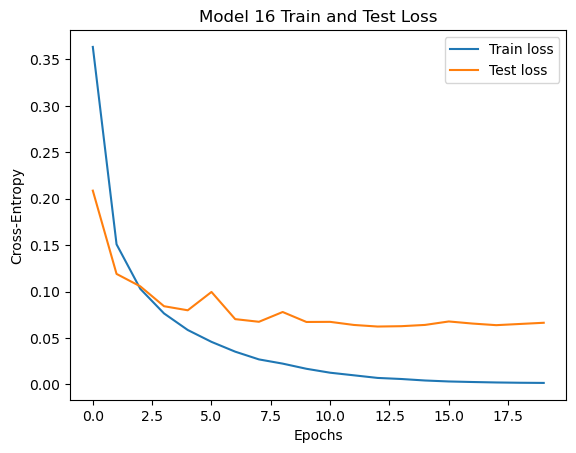

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 16 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

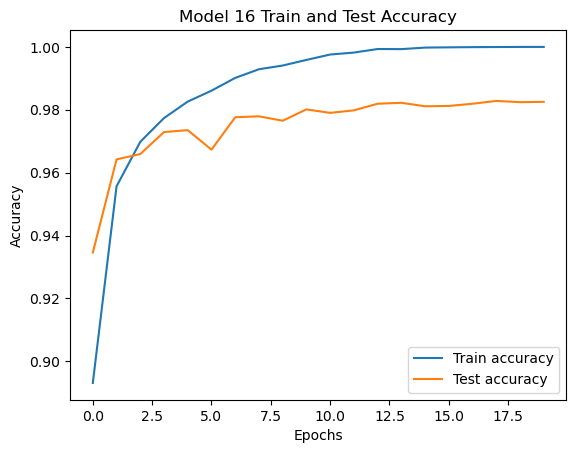

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 16 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 16 Model | Test Data
test_loss, test_acc = model16.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.0665 - accuracy: 0.9825
Test Accuracy: 0.9825000166893005
Test Loss: 0.06645575165748596


In [ ]:
# Make predictions on the test set
y_pred = model16.predict(x_test)

 86/313 [=======>......................] - ETA: 0s

2023-09-02 22:05:37.712699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 17
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.01
- Weight Initialization: He

In [ ]:
# Create the model
model17 = Sequential()
model17.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model17.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model17.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model17.add(Dense(10, activation='softmax', name='output_layer'))
model17.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model17.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model17.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model17.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  5/469 [..............................] - ETA: 6s - loss: 2.3103 - accuracy: 0.0875  

2023-09-02 22:05:38.627002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


468/469 [============================>.] - ETA: 0s - loss: 1.0157 - accuracy: 0.7358

2023-09-02 22:05:43.204038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 1.0149 - accuracy: 0.7361 - val_loss: 0.4337 - val_accuracy: 0.8850
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3766 - accuracy: 0.8971 - val_loss: 0.3085 - val_accuracy: 0.9126
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3027 - accuracy: 0.9144 - val_loss: 0.2736 - val_accuracy: 0.9239
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2642 - accuracy: 0.9239 - val_loss: 0.2444 - val_accuracy: 0.9306
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2381 - accuracy: 0.9313 - val_loss: 0.2203 - val_accuracy: 0.9362
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2176 - accuracy: 0.9378 - val_loss: 0.2089 - val_accuracy: 0.9387
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2006 - accuracy: 0.9431 - val_loss: 0.1891 - val_accuracy: 0.9447
Epoch 8/20

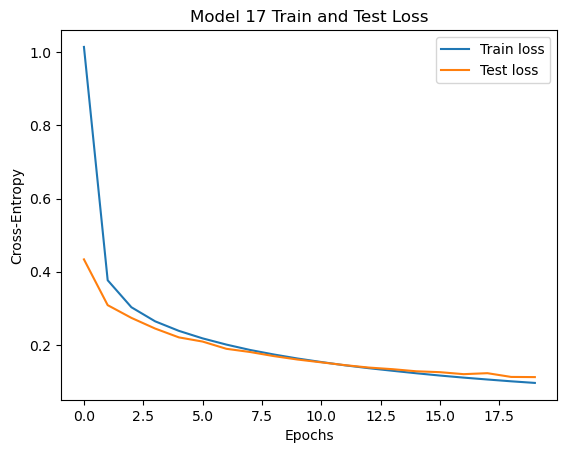

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 17 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

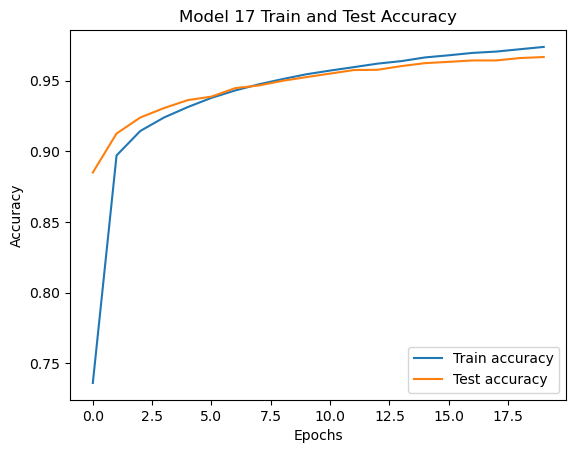

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 17 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 17 Model | Test Data
test_loss, test_acc = model17.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.1116 - accuracy: 0.9667
Test Accuracy: 0.96670001745224
Test Loss: 0.11163374036550522


In [ ]:
# Make predictions on the test set
y_pred = model17.predict(x_test)

 88/313 [=======>......................] - ETA: 0s

2023-09-02 22:07:21.465875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Model 18
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.001
- Weight Initialization: He

In [ ]:
# Create the model
model18 = Sequential()
model18.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model18.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model18.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model18.add(Dense(10, activation='softmax', name='output_layer'))
model18.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model18.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 724826 (2.76 MB)
Trainable params: 724826 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model18.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model18.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  5/469 [..............................] - ETA: 7s - loss: 2.3445 - accuracy: 0.0953  

2023-09-02 22:07:22.364658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.1684 - accuracy: 0.3167

2023-09-02 22:07:26.958309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 5s 11ms/step - loss: 2.1684 - accuracy: 0.3167 - val_loss: 1.9991 - val_accuracy: 0.5107
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.8145 - accuracy: 0.6160 - val_loss: 1.5870 - val_accuracy: 0.6894
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.3979 - accuracy: 0.7357 - val_loss: 1.1802 - val_accuracy: 0.7665
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.0574 - accuracy: 0.7866 - val_loss: 0.9039 - val_accuracy: 0.8089
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8402 - accuracy: 0.8160 - val_loss: 0.7366 - val_accuracy: 0.8309
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.7059 - accuracy: 0.8364 - val_loss: 0.6311 - val_accuracy: 0.8488
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6176 - accuracy: 0.8504 - val_loss: 0.5594 - val_accuracy: 0.8622
Epoch 8/20

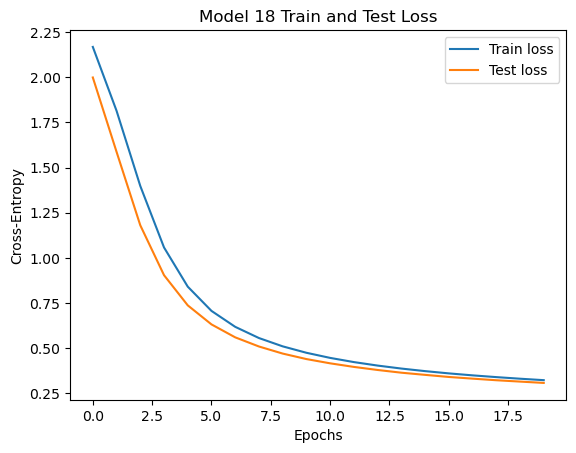

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 18 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

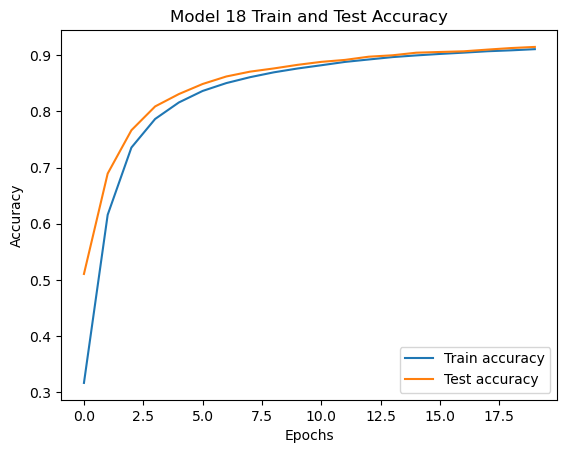

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 18 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 18 Model | Test Data
test_loss, test_acc = model18.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 8ms/step - loss: 0.3069 - accuracy: 0.9148
Test Accuracy: 0.9147999882698059
Test Loss: 0.306887149810791


In [ ]:
# Make predictions on the test set
y_pred = model18.predict(x_test)

 87/313 [=======>......................] - ETA: 0s

2023-09-02 22:09:04.199820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.89      0.93      0.91       982
           5       0.90      0.86      0.88       892
           6       0.92      0.94      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.90      0.87      0.89       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Model 19
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.1
- Weight Initialization: Random

In [ ]:
# Create the model
model19 = Sequential()
model19.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model19.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model19.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model19.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model19.add(Dense(10, activation='softmax', name='output_layer'))
model19.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model19.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model19.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model19.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 22:09:05.086312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.8546 - accuracy: 0.7323

2023-09-02 22:09:10.068393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 0.8546 - accuracy: 0.7323 - val_loss: 0.2582 - val_accuracy: 0.9208
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2029 - accuracy: 0.9390 - val_loss: 0.1638 - val_accuracy: 0.9510
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1275 - accuracy: 0.9619 - val_loss: 0.1181 - val_accuracy: 0.9627
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0904 - accuracy: 0.9727 - val_loss: 0.0918 - val_accuracy: 0.9712
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0680 - accuracy: 0.9794 - val_loss: 0.0988 - val_accuracy: 0.9671
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0540 - accuracy: 0.9841 - val_loss: 0.1206 - val_accuracy: 0.9626
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.0775 - val_accuracy: 0.9760
Epoch 8/20

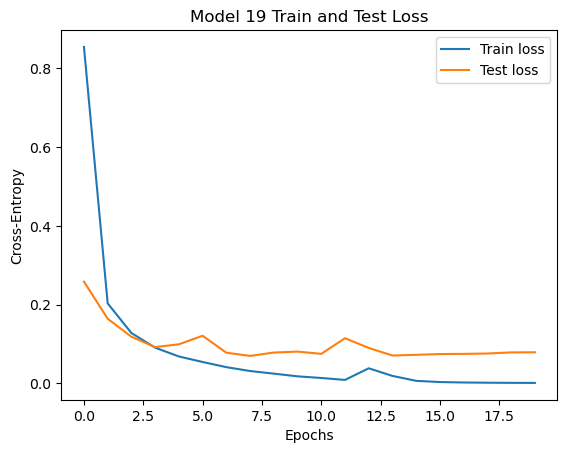

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 19 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

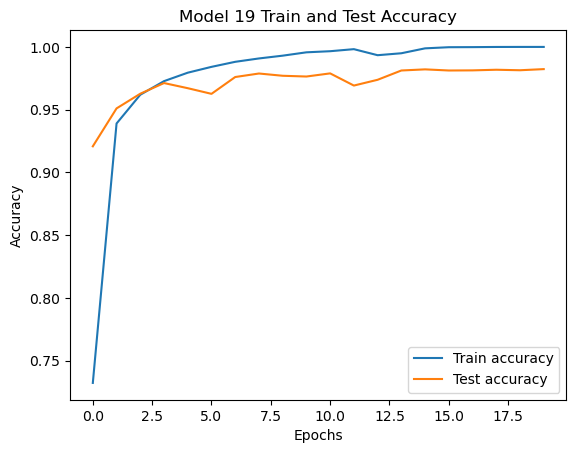

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 19 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 19 Model | Test Data
test_loss, test_acc = model19.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 9ms/step - loss: 0.0786 - accuracy: 0.9823
Test Accuracy: 0.9822999835014343
Test Loss: 0.07862447202205658


In [ ]:
# Make predictions on the test set
y_pred = model19.predict(x_test)

 53/313 [====>.........................] - ETA: 0s

2023-09-02 22:10:52.536273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 20
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.01
- Weight Initialization: Random

In [ ]:
# Create the model
model20 = Sequential()
model20.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model20.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model20.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model20.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model20.add(Dense(10, activation='softmax', name='output_layer'))
model20.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model20.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model20.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model20.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  5/469 [..............................] - ETA: 7s - loss: 2.3034 - accuracy: 0.1031  

2023-09-02 22:10:53.572892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2853 - accuracy: 0.2059

2023-09-02 22:10:58.688999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 12ms/step - loss: 2.2853 - accuracy: 0.2059 - val_loss: 2.2535 - val_accuracy: 0.3541
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 2.0785 - accuracy: 0.4591 - val_loss: 1.6391 - val_accuracy: 0.5387
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 1.0408 - accuracy: 0.7067 - val_loss: 0.6688 - val_accuracy: 0.7961
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5890 - accuracy: 0.8194 - val_loss: 0.5001 - val_accuracy: 0.8509
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4660 - accuracy: 0.8623 - val_loss: 0.4117 - val_accuracy: 0.8781
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3856 - accuracy: 0.8895 - val_loss: 0.3501 - val_accuracy: 0.8981
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3308 - accuracy: 0.9063 - val_loss: 0.3016 - val_accuracy: 0.9117
Epoch 8/20

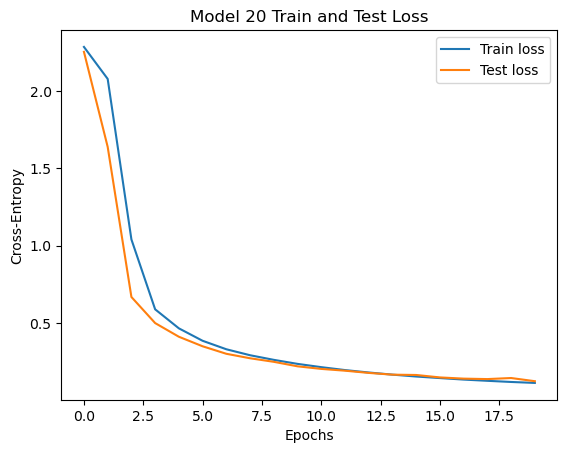

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 20 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

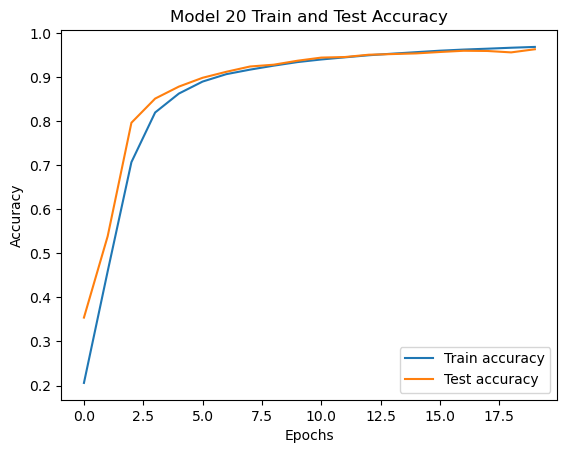

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 20 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 20 Model | Test Data
test_loss, test_acc = model20.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 9ms/step - loss: 0.1243 - accuracy: 0.9628
Test Accuracy: 0.9628000259399414
Test Loss: 0.12433039397001266


In [ ]:
# Make predictions on the test set
y_pred = model20.predict(x_test)

 77/313 [======>.......................] - ETA: 0s

2023-09-02 22:12:50.506417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.97      0.96       982
           5       0.95      0.96      0.95       892
           6       0.96      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Model 21
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.001
- Weight Initialization: Random

In [ ]:
# Create the model
model21 = Sequential()
model21.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model21.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model21.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model21.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model21.add(Dense(10, activation='softmax', name='output_layer'))
model21.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model21.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model21.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model21.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  3/469 [..............................] - ETA: 13s - loss: 2.3028 - accuracy: 0.0260 

2023-09-02 22:12:51.542195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3022 - accuracy: 0.0565

2023-09-02 22:12:56.964665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 13ms/step - loss: 2.3022 - accuracy: 0.0565 - val_loss: 2.3002 - val_accuracy: 0.0811
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.2987 - accuracy: 0.1175 - val_loss: 2.2967 - val_accuracy: 0.1512
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2952 - accuracy: 0.1689 - val_loss: 2.2930 - val_accuracy: 0.1819
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2913 - accuracy: 0.1887 - val_loss: 2.2889 - val_accuracy: 0.1966
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2870 - accuracy: 0.2075 - val_loss: 2.2841 - val_accuracy: 0.2162
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2819 - accuracy: 0.2370 - val_loss: 2.2785 - val_accuracy: 0.2526
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2758 - accuracy: 0.2762 - val_loss: 2.2717 - val_accuracy: 0.2922
Epoch 8/20

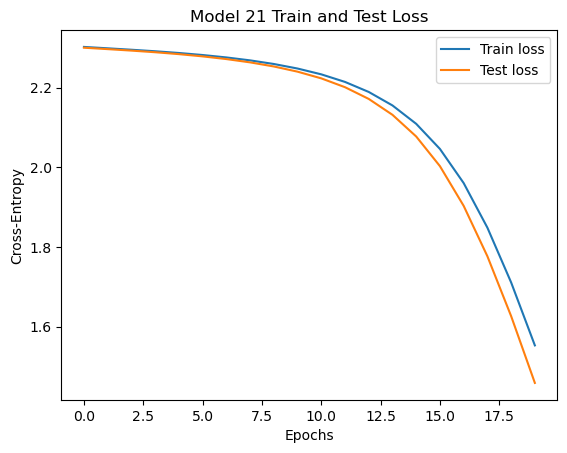

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 21 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

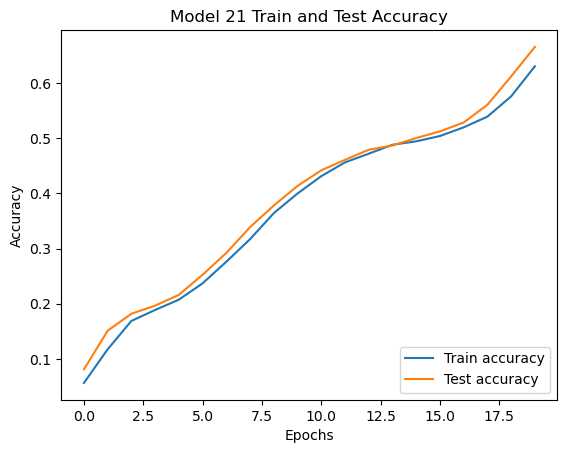

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 21 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 21 Model | Test Data
test_loss, test_acc = model21.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 9ms/step - loss: 1.4591 - accuracy: 0.6656
Test Accuracy: 0.6656000018119812
Test Loss: 1.4590710401535034


In [ ]:
# Make predictions on the test set
y_pred = model21.predict(x_test)

 83/313 [======>.......................] - ETA: 0s

2023-09-02 22:14:49.036233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       980
           1       0.74      0.98      0.84      1135
           2       0.74      0.49      0.58      1032
           3       0.71      0.77      0.74      1010
           4       0.71      0.44      0.54       982
           5       1.00      0.05      0.10       892
           6       0.57      0.92      0.70       958
           7       0.72      0.76      0.74      1028
           8       0.55      0.66      0.60       974
           9       0.59      0.53      0.56      1009

    accuracy                           0.67     10000
   macro avg       0.70      0.66      0.62     10000
weighted avg       0.70      0.67      0.63     10000



### Model 22
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.1
- Weight Initialization: He

In [ ]:
# Create the model
model22 = Sequential()
model22.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model22.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model22.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model22.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model22.add(Dense(10, activation='softmax', name='output_layer'))
model22.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model22.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model22.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model22.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  1/469 [..............................] - ETA: 2:03 - loss: 2.3609 - accuracy: 0.0625

2023-09-02 22:14:50.032728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3546 - accuracy: 0.8943

2023-09-02 22:14:55.578486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 13ms/step - loss: 0.3546 - accuracy: 0.8943 - val_loss: 0.1755 - val_accuracy: 0.9468
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1286 - accuracy: 0.9614 - val_loss: 0.0996 - val_accuracy: 0.9679
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0853 - accuracy: 0.9747 - val_loss: 0.0889 - val_accuracy: 0.9723
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0969 - val_accuracy: 0.9681
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0707 - val_accuracy: 0.9793
Epoch 8/20

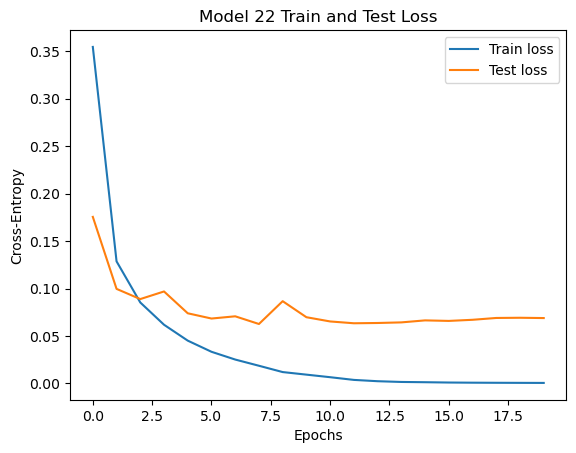

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 22 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

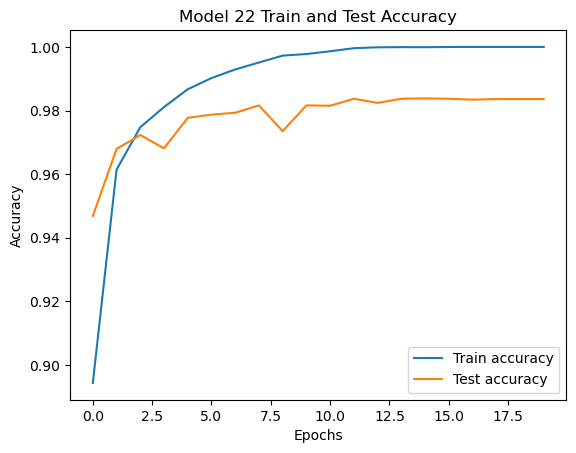

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 22 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 22 Model | Test Data
test_loss, test_acc = model22.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 9ms/step - loss: 0.0689 - accuracy: 0.9836
Test Accuracy: 0.9836000204086304
Test Loss: 0.0689004436135292


In [ ]:
# Make predictions on the test set
y_pred = model22.predict(x_test)

 83/313 [======>.......................] - ETA: 0s

2023-09-02 22:16:48.264507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 23
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.01
- Weight Initialization: He

In [ ]:
# Create the model
model23 = Sequential()
model23.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model23.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model23.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model23.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model23.add(Dense(10, activation='softmax', name='output_layer'))
model23.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model23.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model23.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model23.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  1/469 [..............................] - ETA: 2:04 - loss: 2.3500 - accuracy: 0.1094

2023-09-02 22:16:49.295854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.8957 - accuracy: 0.7675

2023-09-02 22:16:54.837954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 13ms/step - loss: 0.8957 - accuracy: 0.7675 - val_loss: 0.3773 - val_accuracy: 0.8962
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3188 - accuracy: 0.9094 - val_loss: 0.2662 - val_accuracy: 0.9251
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2530 - accuracy: 0.9269 - val_loss: 0.2287 - val_accuracy: 0.9330
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2171 - accuracy: 0.9374 - val_loss: 0.1984 - val_accuracy: 0.9425
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1914 - accuracy: 0.9443 - val_loss: 0.1869 - val_accuracy: 0.9450
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1718 - accuracy: 0.9503 - val_loss: 0.1627 - val_accuracy: 0.9516
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1556 - accuracy: 0.9556 - val_loss: 0.1537 - val_accuracy: 0.9538
Epoch 8/20

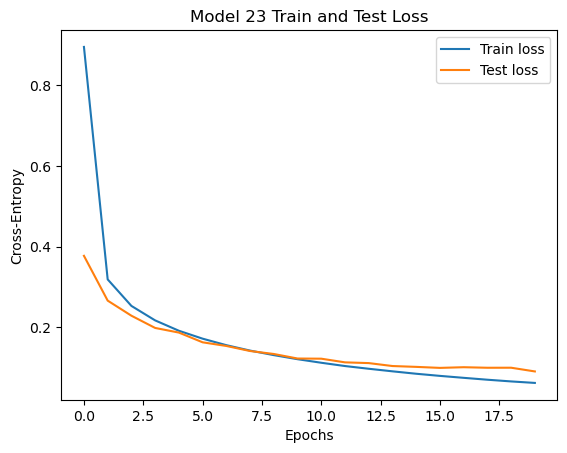

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 23 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

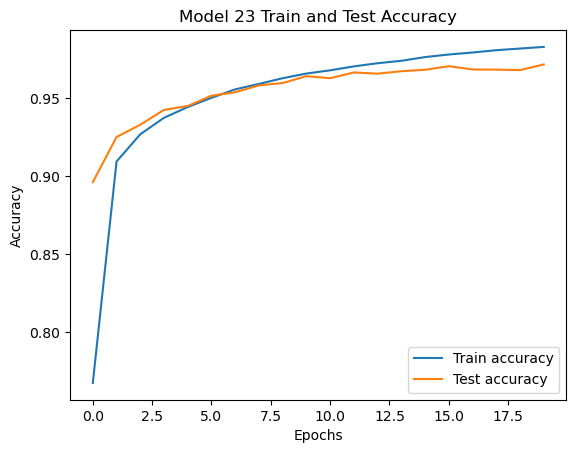

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 23 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 23 Model | Test Data
test_loss, test_acc = model23.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.0904 - accuracy: 0.9716
Test Accuracy: 0.9715999960899353
Test Loss: 0.09044763445854187


In [ ]:
# Make predictions on the test set
y_pred = model23.predict(x_test)

 81/313 [======>.......................] - ETA: 0s

2023-09-02 22:18:50.534282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.95      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.96      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Model 24
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 256
- The number of nodes in the hidden layer near the output layer: 64
- Learning Rate: 0.001
- Weight Initialization: He

In [ ]:
# Create the model
model24 = Sequential()
model24.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model24.add(Dense(256, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model24.add(Dense(128, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model24.add(Dense(64, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model24.add(Dense(10, activation='softmax', name='output_layer'))
model24.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model24.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer3 (Dense)       (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model24.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model24.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  1/469 [..............................] - ETA: 2:04 - loss: 2.3681 - accuracy: 0.0781

2023-09-02 22:18:51.586252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2081 - accuracy: 0.2021

2023-09-02 22:18:57.170235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 13ms/step - loss: 2.2081 - accuracy: 0.2021 - val_loss: 2.0651 - val_accuracy: 0.3159
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.9138 - accuracy: 0.4426 - val_loss: 1.7148 - val_accuracy: 0.5414
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.5269 - accuracy: 0.6260 - val_loss: 1.3031 - val_accuracy: 0.7032
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.1439 - accuracy: 0.7477 - val_loss: 0.9621 - val_accuracy: 0.7852
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.8650 - accuracy: 0.8031 - val_loss: 0.7444 - val_accuracy: 0.8191
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6963 - accuracy: 0.8301 - val_loss: 0.6162 - val_accuracy: 0.8445
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5937 - accuracy: 0.8490 - val_loss: 0.5347 - val_accuracy: 0.8614
Epoch 8/20

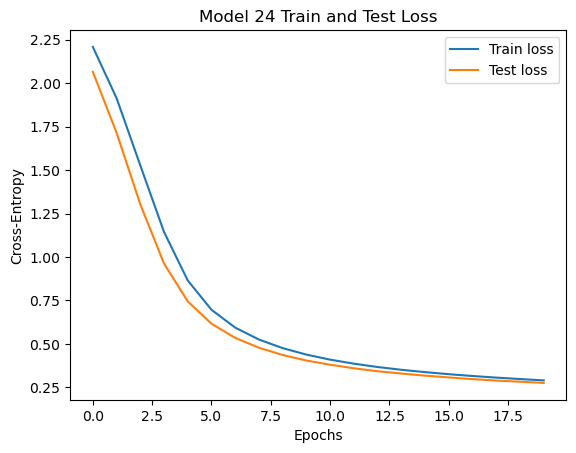

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 24 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

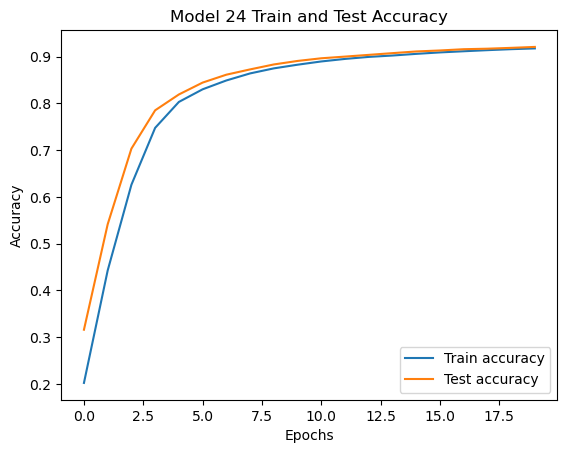

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 24 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 24 Model | Test Data
test_loss, test_acc = model24.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 11ms/step - loss: 0.2756 - accuracy: 0.9208
Test Accuracy: 0.920799970626831
Test Loss: 0.27562233805656433


In [ ]:
# Make predictions on the test set
y_pred = model24.predict(x_test)

 39/313 [==>...........................] - ETA: 0s

2023-09-02 22:20:56.510962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.94      0.92       982
           5       0.91      0.86      0.88       892
           6       0.92      0.94      0.93       958
           7       0.94      0.91      0.92      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Model 25
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.1
- Weight Initialization: Random

In [ ]:
# Create the model
model25 = Sequential()
model25.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model25.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model25.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model25.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model25.add(Dense(10, activation='softmax', name='output_layer'))
model25.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model25.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model25.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model25.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 22:20:57.768746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.1568 - accuracy: 0.6030

2023-09-02 22:21:04.203260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 15ms/step - loss: 1.1568 - accuracy: 0.6030 - val_loss: 0.3408 - val_accuracy: 0.8971
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2182 - accuracy: 0.9351 - val_loss: 0.1520 - val_accuracy: 0.9552
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 0.1071 - val_accuracy: 0.9663
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0918 - accuracy: 0.9724 - val_loss: 0.0965 - val_accuracy: 0.9698
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0708 - accuracy: 0.9789 - val_loss: 0.0853 - val_accuracy: 0.9752
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 0.0860 - val_accuracy: 0.9736
Epoch 8/20

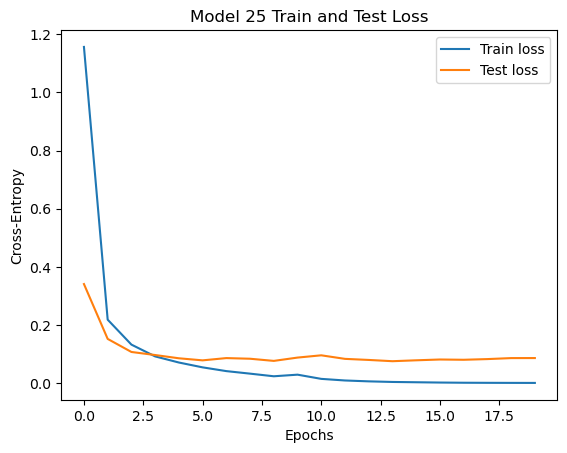

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 25 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

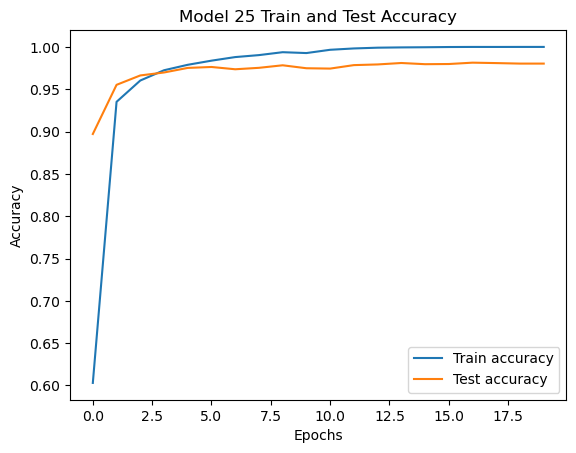

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 25 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 25 Model | Test Data
test_loss, test_acc = model25.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.0861 - accuracy: 0.9803
Test Accuracy: 0.9803000092506409
Test Loss: 0.08612284064292908


In [ ]:
# Make predictions on the test set
y_pred = model25.predict(x_test)

 52/313 [===>..........................] - ETA: 0s

2023-09-02 22:23:03.296376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 26
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.01
- Weight Initialization: Random

In [ ]:
# Create the model
model26 = Sequential()
model26.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model26.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model26.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model26.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model26.add(Dense(10, activation='softmax', name='output_layer'))
model26.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model26.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model26.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model26.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 22:23:04.258472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.2981 - accuracy: 0.1127

2023-09-02 22:23:09.888772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 13ms/step - loss: 2.2981 - accuracy: 0.1127 - val_loss: 2.2922 - val_accuracy: 0.1142
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.2750 - accuracy: 0.1989 - val_loss: 2.2371 - val_accuracy: 0.3359
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0376 - accuracy: 0.3756 - val_loss: 1.6829 - val_accuracy: 0.4931
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.3030 - accuracy: 0.6043 - val_loss: 0.9459 - val_accuracy: 0.7050
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7920 - accuracy: 0.7594 - val_loss: 0.6299 - val_accuracy: 0.8153
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5683 - accuracy: 0.8364 - val_loss: 0.4743 - val_accuracy: 0.8637
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4511 - accuracy: 0.8726 - val_loss: 0.3876 - val_accuracy: 0.8888
Epoch 8/20

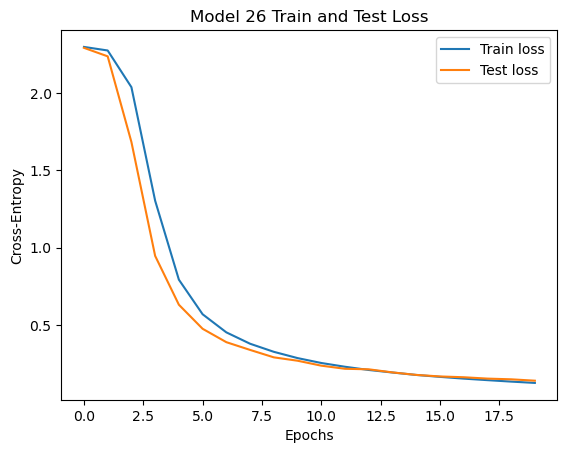

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 26 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

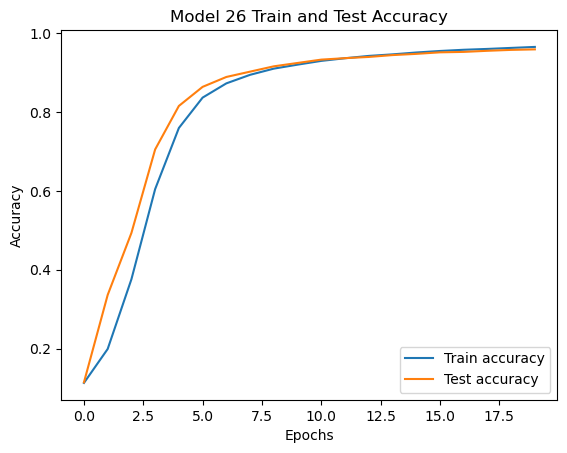

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 26 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 26 Model | Test Data
test_loss, test_acc = model26.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.1384 - accuracy: 0.9588
Test Accuracy: 0.9588000178337097
Test Loss: 0.13835658133029938


In [ ]:
# Make predictions on the test set
y_pred = model26.predict(x_test)

 82/313 [======>.......................] - ETA: 0s

2023-09-02 22:25:06.278453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.95      0.96       982
           5       0.96      0.94      0.95       892
           6       0.97      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.93      0.95      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Model 27
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.001
- Weight Initialization: Random

In [ ]:
# Create the model
model27 = Sequential()
model27.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model27.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer='random_uniform'))
model27.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer='random_uniform'))
model27.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer='random_uniform'))
model27.add(Dense(10, activation='softmax', name='output_layer'))
model27.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model27.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model27.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model27.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 22:25:07.235013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.3020 - accuracy: 0.1487

2023-09-02 22:25:12.830780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 13ms/step - loss: 2.3020 - accuracy: 0.1487 - val_loss: 2.3013 - val_accuracy: 0.1364
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.3008 - accuracy: 0.1258 - val_loss: 2.3002 - val_accuracy: 0.1237
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.2997 - accuracy: 0.1173 - val_loss: 2.2990 - val_accuracy: 0.1176
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 2.2985 - accuracy: 0.1142 - val_loss: 2.2977 - val_accuracy: 0.1143
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 2.2971 - accuracy: 0.1129 - val_loss: 2.2962 - val_accuracy: 0.1141
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 2.2956 - accuracy: 0.1129 - val_loss: 2.2946 - val_accuracy: 0.1146
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 2.2939 - accuracy: 0.1135 - val_loss: 2.2927 - val_accuracy: 0.1158
Epoch 8/20

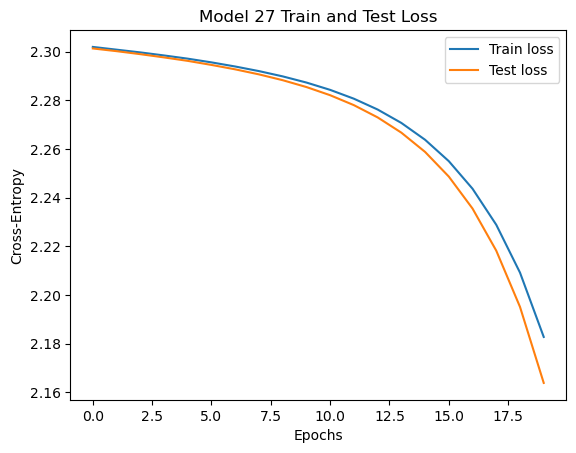

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 27 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

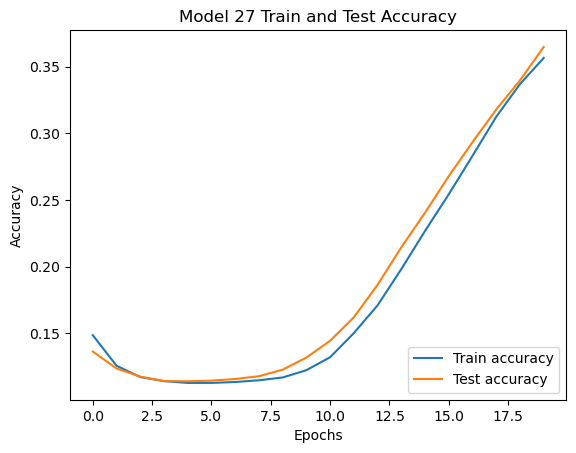

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 27 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 27 Model | Test Data
test_loss, test_acc = model27.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 2.1639 - accuracy: 0.3649
Test Accuracy: 0.36489999294281006
Test Loss: 2.163855791091919


In [ ]:
# Make predictions on the test set
y_pred = model27.predict(x_test)

 72/313 [=====>........................] - ETA: 0s

2023-09-02 22:27:16.642084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       980
           1       0.27      0.99      0.43      1135
           2       0.55      0.34      0.42      1032
           3       0.00      0.00      0.00      1010
           4       0.40      0.05      0.09       982
           5       0.00      0.00      0.00       892
           6       0.30      0.94      0.45       958
           7       0.54      0.61      0.57      1028
           8       0.70      0.06      0.11       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.36     10000
   macro avg       0.34      0.35      0.27     10000
weighted avg       0.34      0.36      0.27     10000



/Users/rabbanikumoro/tensorflow-test/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rabbanikumoro/tensorflow-test/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rabbanikumoro/tensorflow-test/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### Model 28
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.1
- Weight Initialization: He

In [ ]:
# Create the model
model28 = Sequential()
model28.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model28.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model28.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model28.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model28.add(Dense(10, activation='softmax', name='output_layer'))
model28.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.1
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model28.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model28.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model28.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  1/469 [..............................] - ETA: 2:18 - loss: 2.3012 - accuracy: 0.1016

2023-09-02 22:27:17.696014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.8796

2023-09-02 22:27:23.712331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 0.3929 - accuracy: 0.8796 - val_loss: 0.1598 - val_accuracy: 0.9526
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1319 - accuracy: 0.9597 - val_loss: 0.1328 - val_accuracy: 0.9576
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0862 - val_accuracy: 0.9717
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0610 - accuracy: 0.9809 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0707 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0479 - accuracy: 0.9879 - val_loss: 0.0811 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0763 - val_accuracy: 0.9766
Epoch 8/20

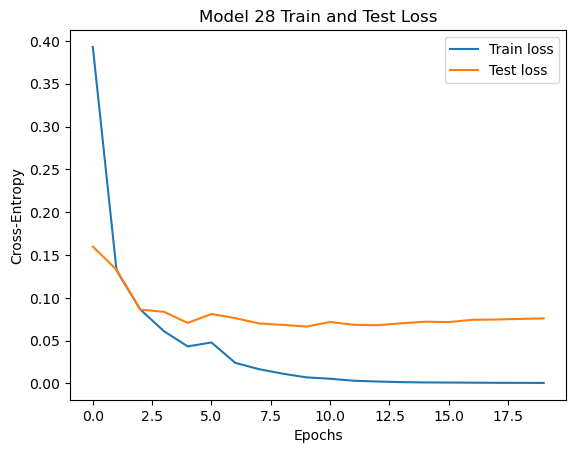

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 28 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

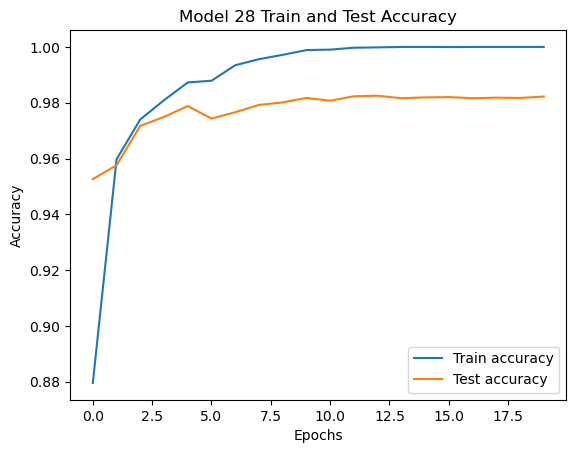

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 28 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 28 Model | Test Data
test_loss, test_acc = model28.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.0760 - accuracy: 0.9822
Test Accuracy: 0.982200026512146
Test Loss: 0.07599548250436783


In [ ]:
# Make predictions on the test set
y_pred = model28.predict(x_test)

 82/313 [======>.......................] - ETA: 0s

2023-09-02 22:29:21.146182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Model 29
- Number of Hidden Layers: 3
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.01
- Weight Initialization: He

In [ ]:
# Create the model
model29 = Sequential()
model29.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model29.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model29.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model29.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model29.add(Dense(10, activation='softmax', name='output_layer'))
model29.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.01
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model29.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model29.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model29.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
  1/469 [..............................] - ETA: 2:04 - loss: 2.3548 - accuracy: 0.1016

2023-09-02 22:29:22.169723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 1.0477 - accuracy: 0.7031

2023-09-02 22:29:27.847972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 1.0477 - accuracy: 0.7031 - val_loss: 0.4105 - val_accuracy: 0.8937
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3476 - accuracy: 0.9030 - val_loss: 0.2873 - val_accuracy: 0.9183
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2721 - accuracy: 0.9221 - val_loss: 0.2424 - val_accuracy: 0.9292
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2342 - accuracy: 0.9323 - val_loss: 0.2162 - val_accuracy: 0.9365
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2087 - accuracy: 0.9397 - val_loss: 0.1974 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1883 - accuracy: 0.9456 - val_loss: 0.1830 - val_accuracy: 0.9476
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1716 - accuracy: 0.9504 - val_loss: 0.1744 - val_accuracy: 0.9482
Epoch 8/20

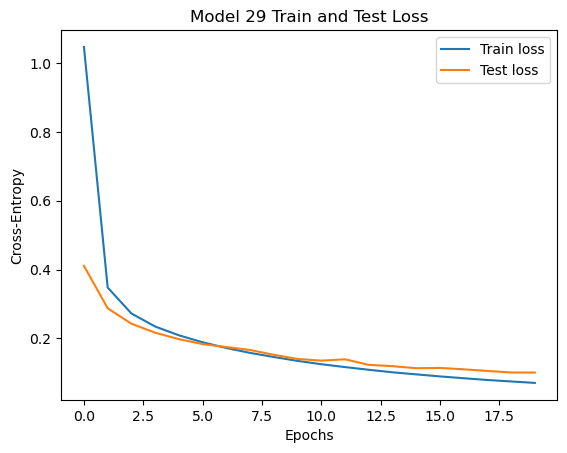

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 29 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

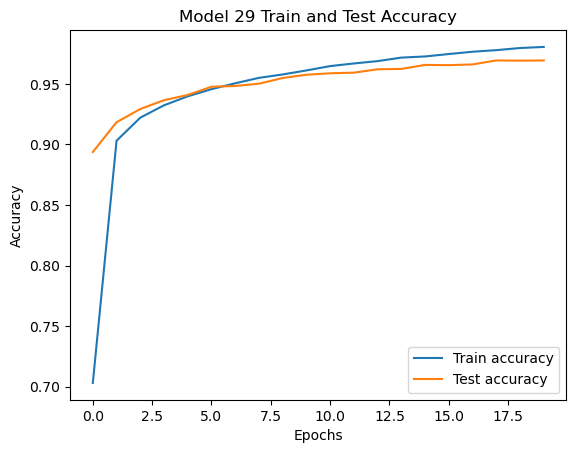

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 29 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 29 Model | Test Data
test_loss, test_acc = model29.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.1002 - accuracy: 0.9693
Test Accuracy: 0.9692999720573425
Test Loss: 0.10020862519741058


In [ ]:
# Make predictions on the test set
y_pred = model29.predict(x_test)

 81/313 [======>.......................] - ETA: 0s

2023-09-02 22:31:29.087755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.94      0.98      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Model 30
- Number of Hidden Layers: 2
- The number of nodes in the hidden layer near the input layer: 128
- The number of nodes in the hidden layer near the output layer: 32
- Learning Rate: 0.001
- Weight Initialization: He

In [ ]:
# Create the model
model30 = Sequential()
model30.add(Dense(784, input_dim=input_size, activation='relu', name='input_layer'))
model30.add(Dense(128, activation='relu', name='hidden_layer', kernel_initializer=he_normal()))
model30.add(Dense(64, activation='relu', name='hidden_layer2', kernel_initializer=he_normal()))
model30.add(Dense(32, activation='relu', name='hidden_layer3', kernel_initializer=he_normal()))
model30.add(Dense(10, activation='softmax', name='output_layer'))
model30.summary()

# Compile the model with manual learning rate and weight initialization
learning_rate = 0.001
sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model30.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 726586 (2.77 MB)
Trainable params: 726586 (2.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# train the network
history = model30.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model30.evaluate(x_test,
                           y_test,
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20


2023-09-02 22:31:30.209337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 2.1869 - accuracy: 0.2565

2023-09-02 22:31:36.312031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 14ms/step - loss: 2.1869 - accuracy: 0.2565 - val_loss: 2.0405 - val_accuracy: 0.3907
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.8889 - accuracy: 0.4351 - val_loss: 1.7080 - val_accuracy: 0.5004
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 1.5535 - accuracy: 0.5672 - val_loss: 1.3671 - val_accuracy: 0.6366
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.2265 - accuracy: 0.6986 - val_loss: 1.0535 - val_accuracy: 0.7584
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.9528 - accuracy: 0.7800 - val_loss: 0.8207 - val_accuracy: 0.8088
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.7660 - accuracy: 0.8125 - val_loss: 0.6730 - val_accuracy: 0.8317
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.6502 - accuracy: 0.8304 - val_loss: 0.5825 - val_accuracy: 0.8457
Epoch 8/20

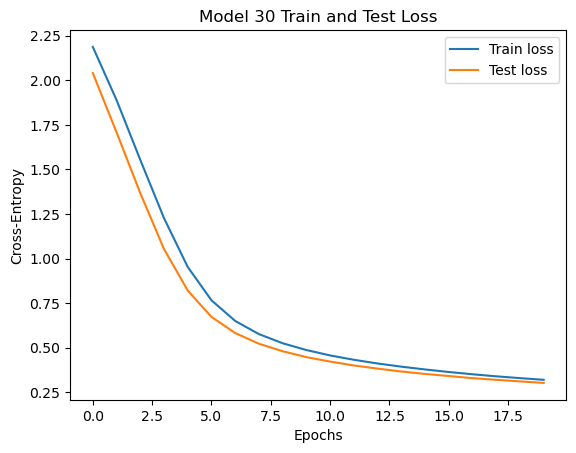

In [ ]:
# Plot history: Loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Model 30 Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

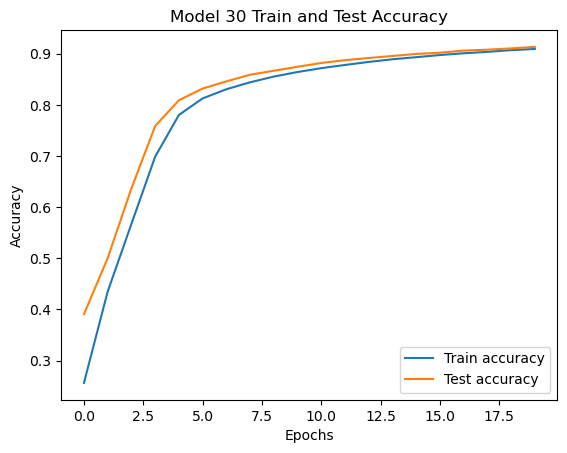

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Model 30 Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# MLP 30 Model | Test Data
test_loss, test_acc = model30.evaluate(x_test, y_test, batch_size=128)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

79/79 [==============================] - 1s 10ms/step - loss: 0.3028 - accuracy: 0.9131
Test Accuracy: 0.913100004196167
Test Loss: 0.3028006851673126


In [ ]:
# Make predictions on the test set
y_pred = model30.predict(x_test)

 53/313 [====>.........................] - ETA: 0s

2023-09-02 22:33:35.003954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.91      0.89      0.90      1010
           4       0.89      0.92      0.90       982
           5       0.90      0.89      0.89       892
           6       0.92      0.94      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.88      0.86      0.87       974
           9       0.87      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
********
***  ***
**    **
*      *
**    **
***  ***
********